# Label transfer visualization

We are checking if label transfer with scVI/scANVI can improve our annotation.

__created__ = "2025-11-11 Tue 16:22:51 GMT"

__updated__ = "2025-11-11"

__version__ = "0.0.9"

__status__ = "Prototype"

__maintainer__ = "Ciro Ramírez-Suástegui"

__author__ = "Ciro Ramírez-Suástegui"

__affiliation__ = "The Wellcome Sanger Institute"

__email__ = "cs59@sanger.ac.uk, cramsuig@gmail.com"

### Structure <a class="anchor" id="Structure"></a>

* Environment setup
* [Global configuration](#global-configuration)
  - Variables and paths
  - Visualisation parameters
* [Loading data](#loading-data)
* [Pre-processing](#pre-processing)
* [Main](#main)
* [Post-processing](#post-processing)
* [Save](#save)

## Environment setup
---

### Basic modules

In [1]:
import os, sys  # paths and files control
import re  # string control
import datetime  # add current date to output

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [2]:
import gc  # garbage collector; gc.collect()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [7]:
os.getcwd()

'/nfs/team298/cs59/eCTCL/analysis/b1_hAtlas'

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [8]:
sys_path_add = ["../../codes/cs59", "../../src/"]
sys_path_add = [i for i in sys_path_add if os.path.exists(i)]
print("Adding %s to sys.path", sys_path_add)
[sys.path.append(i) for i in sys_path_add if i not in sys.path]

Adding %s to sys.path ['../../codes/cs59', '../../src/']


[None, None]

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

### In-house/developing modules

In [9]:
# Stuff I use across projects (in src)
import share.code.plotting as spl
import share.code.utils as utils
from share.code.mplborder import BORDER_RC

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

### Logging configuration

In [10]:
from logger import logger, _repo_root, _hide_base_path

[2025-12-08 14:32:00] INFO eCTCL [logger.py:setup_logger:155] Working at /eCTCL


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [11]:
# fmt: off
logger.info(f'Environ: {_hide_base_path(os.__file__)}')
logger.info(f'Project: {_hide_base_path(os.getcwd())} (current path)')
logger.info(os.popen("echo Machine: ${HOSTNAME} ${SLURMD_NODENAME} ${PBS_NODEFILE}").read().rstrip())
# fmt: on

[2025-12-08 14:32:00] INFO eCTCL [984088284.py:<module>:2] Environ: /miniforge3/envs/rapids_singlecell/lib/python3.11/os.py
[2025-12-08 14:32:00] INFO eCTCL [984088284.py:<module>:3] Project: /eCTCL/analysis/b1_hAtlas (current path)
[2025-12-08 14:32:00] INFO eCTCL [984088284.py:<module>:4] Machine: farm22-gpu0305


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

### Tool (packaged) modules

In [12]:
import scanpy as sc
import rapids_singlecell as rsc

/software/cellgen/team361/cs59/miniforge3/envs/rapids_singlecell/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [13]:
import matplotlib.pyplot as plt  # manage plotting styles and parameters

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

## [Global configuration](#menu) <a class="anchor" id="global-configuration"></a>
---

### Variables and paths

Propagation
* **indata_name** > result_name, inputs_file > output_name > output_file
* **action_name** > result_name, output_resu, output_file

In [14]:
indata_name = "sp_b1_hAtlas_DG14_ann-scANVI"
action_name = "viz"
extent_strn = "h5ad"
result_name = f"{indata_name}_{action_name}"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [15]:
inputs_path = "../../data"
inputs_file = "../../data/processed/sp_b1_hAtlas_DG14_ann-scANVI_combined.h5ad"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [16]:
output_resu = os.path.join("../../intermediate/output", f"{result_name}")
output_figs = os.path.join("../../intermediate/output", f"{result_name}")
output_name = indata_name

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [17]:
output_file = os.path.join(
    inputs_path, "processed", f"{output_name}_{action_name}.{extent_strn}"
)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [18]:
OUTPUTS = dict()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [19]:
%whos str dict

Variable      Type    Data/Info
-------------------------------
BORDER_RC     dict    n=3
OUTPUTS       dict    n=0
action_name   str     viz
extent_strn   str     h5ad
indata_name   str     sp_b1_hAtlas_DG14_ann-scANVI
inputs_file   str     ../../data/processed/sp_b1_hAtlas_DG14_ann-scANVI_combined.h5ad
inputs_path   str     ../../data
output_figs   str     ../../intermediate/output/sp_b1_hAtlas_DG14_ann-scANVI_viz
output_file   str     ../../data/processed/sp_b1_hAtlas_DG14_ann-scANVI_viz.h5ad
output_name   str     sp_b1_hAtlas_DG14_ann-scANVI
output_resu   str     ../../intermediate/output/sp_b1_hAtlas_DG14_ann-scANVI_viz
result_name   str     sp_b1_hAtlas_DG14_ann-scANVI_viz


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

## [Loading data](#menu) <a class="anchor" id="loading-data"></a>
---

In [20]:
adata = sc.read(inputs_file)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [21]:
logger.info("Object\n" + adata.__str__())

[2025-12-08 14:37:18] INFO eCTCL [1080568789.py:<module>:1] Object
AnnData object with n_obs × n_vars = 507381 × 4472
    obs: 'Sanger_ID', 'tissue', 'site', 'Sex', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'study', 'donor', 'tech', 'cell_type', 'barcode', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'necrotic', 'file_id', 'obs_names_before_b1_hAtlas', 'ref_query', '_scvi_batch', '_scvi_labels', 'celltype_scanvi', 'C_scANVI'
    uns: 'C_scANVI_colors', '_scvi_manager_uuid', '_scvi_uuid', 'broad_ct_colors', 'cell_type_colors', 'dataset', 'groups1_colors', 'leiden', 'neighbors', 'pca', 'preprocessi

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

## [Pre-processing](#menu) <a class="anchor" id="pre-processing"></a>
---

In [22]:
SCANVI_LATENT_KEY = "X_scANVI_5k"
SCANVI_PREDICTION_KEY = "C_scANVI"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

### Calculating neighbours and UMAP

In [23]:
rsc.pp.neighbors(adata, use_rep=SCANVI_LATENT_KEY)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [24]:
rsc.tl.umap(adata)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

## [Main](#menu) <a class="anchor" id="main"></a>
---

### Visualizing

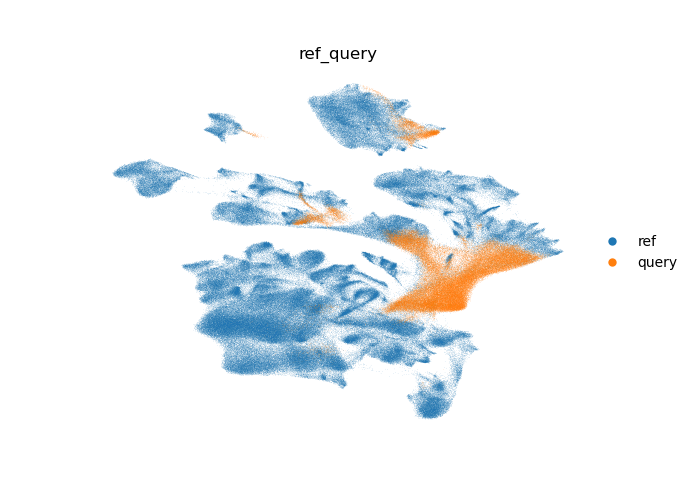

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [25]:
fig_config = {
    "plot_type": "umap-scanvi",
    "col_var": "ref_query",
}
filename = utils.filename_create(**spl.filename_plot(fig_config))
with plt.rc_context({"patch.linewidth": 0.001}):
    OUTPUTS.update(
        {
            filename: sc.pl.embedding(
                adata,
                basis="X_umap",
                color=fig_config["col_var"],
                return_fig=True,
                frameon=False,
            )
        }
    )

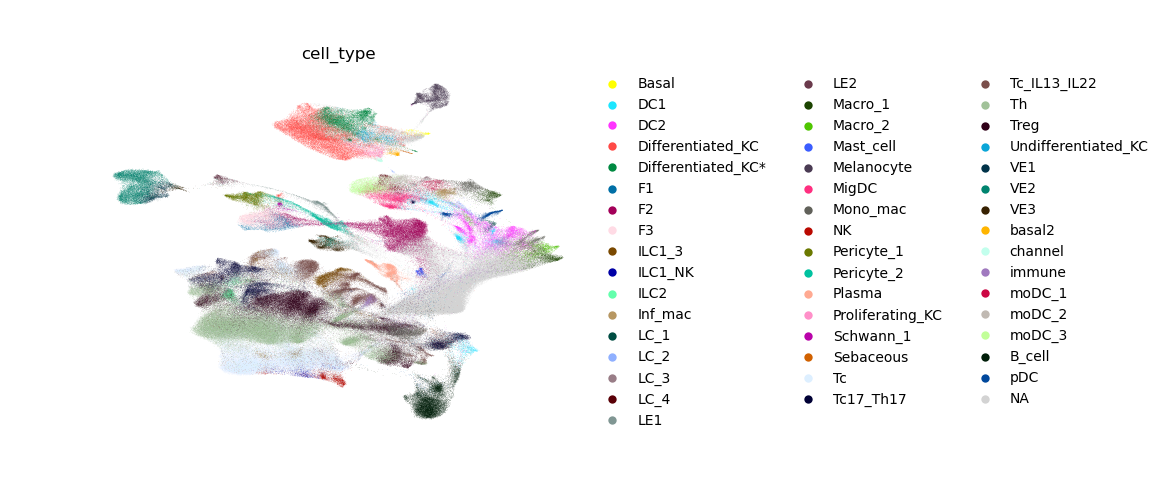

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [22]:
fig_config = {
    "plot_type": "umap-scanvi",
    "col_var": "cell_type",
}
filename = utils.filename_create(**spl.filename_plot(fig_config))
with plt.rc_context({"patch.linewidth": 0.001}):
    OUTPUTS.update({
        filename: sc.pl.embedding(
            adata,
            basis="X_umap",
            color=fig_config["col_var"],
            return_fig=True,
            frameon=False,
        )
    })

In [24]:
fig_config["col_var"] = SCANVI_PREDICTION_KEY
filename = utils.filename_create(**spl.filename_plot(fig_config))
with plt.rc_context({"patch.linewidth": 0.001}):
    OUTPUTS.update({
        filename: sc.pl.embedding(
            adata,
            basis="X_umap",
            color=fig_config["col_var"],
            return_fig=True,
            frameon=False,
        )
    })

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

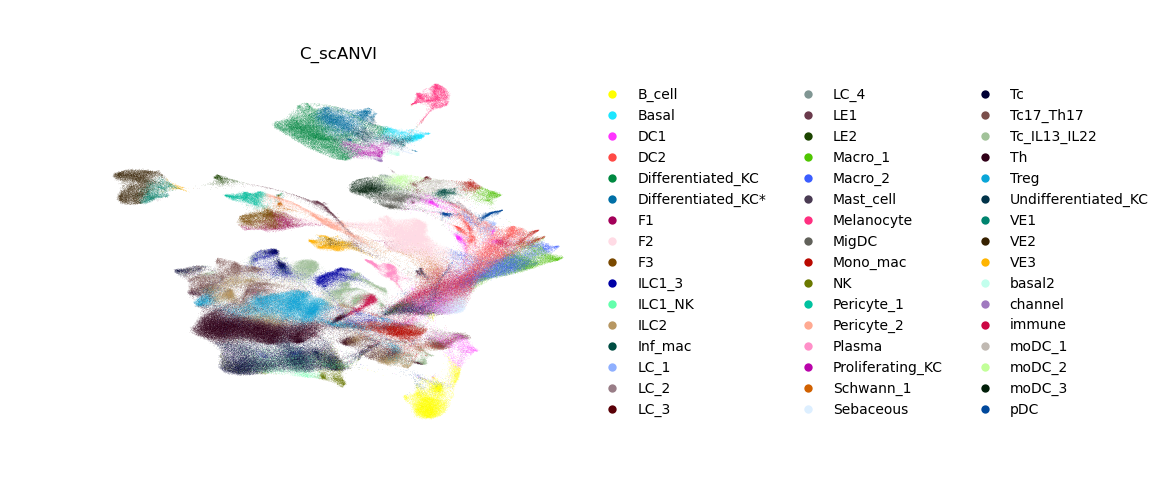

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [25]:
OUTPUTS[filename]

Ideally, we want another method here that we predicted separately?

In [26]:
df = adata.obs.groupby(["cell_type", SCANVI_PREDICTION_KEY]).size().unstack(fill_value=0)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [27]:
conf_mat = df / df.sum(axis=1).values[:, np.newaxis]

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [29]:
plt.close("all")

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [33]:
with plt.rc_context({"figure.autolayout": True, "patch.linewidth": 0.001}):
    plt.figure(figsize=(8, 8))
    _ = plt.pcolor(conf_mat)
    _ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
    _ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
    plt.xlabel("Predicted")
    plt.ylabel("Observed")

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

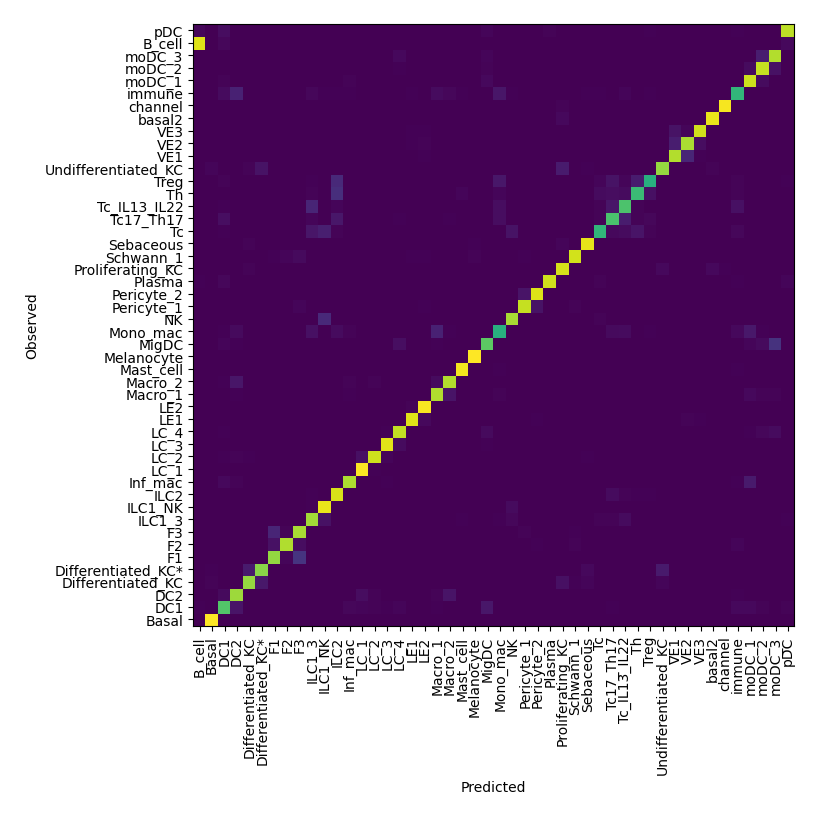

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [34]:
plt.show()

## [Post-processing](#menu) <a class="anchor" id="post-processing"></a>
---

In [105]:
temp = list(OUTPUTS.keys())
logger.info(f"Outputs captured ({len(temp)}):\n " + "\n ".join(temp))

[2025-11-10 14:16:55] INFO eCTCL [641707671.py:<module>:2] Outputs captured (5):
 umap___cell-type-pred_____
 umap___cell-type-pred_____frameon:False
 umap___ref-query_____frameon:False
 umap___cell-type_____frameon:False
 umap___cell-type-uncertainty_____frameon:False


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [ ]:
temp = list(OUTPUTS.keys())
OUTPUTS_FINAL = OUTPUTS.copy()

In [ ]:
for i in temp:
    if len(re.findall(r"params|colours", i)) > 0:
        del OUTPUTS_FINAL[i]

In [ ]:
temp = list(OUTPUTS_FINAL.keys())
logger.info(f"Outputs to write ({len(temp)}):\n " + "\n ".join(temp))

## [Save](#menu) <a class="anchor" id="save"></a>
---

In [106]:
output_resu

'./results/sp_b1_hAtlas_ann-scANVI'

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [107]:
utils.output_save_list(OUTPUTS, output_resu)

Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/00_umap___cell-type-pred_____  √
Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/01_umap___cell-type-pred_____frameon:False  √
Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/02_umap___ref-query_____frameon:False  √
Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/03_umap___cell-type_____frameon:False  √
Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/04_umap___cell-type-uncertainty_____frameon:False  √


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [81]:
scanvi_model.save(inputs_query.replace(".zarr", "_ref_model"))

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [82]:
query_model.save(inputs_query.replace(".zarr", "_model"))

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [83]:
logger.info(f"Saving results to:\n{output_file}")

[2025-11-11 16:20:37] INFO eCTCL [1882014874.py:<module>:1] Saving results to:
../data/processed/sp_b1_hAtlas_DG14_ann-scANVI.zarr


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [84]:
adata.write(output_file.replace(".zarr", "_combined.h5ad"))

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

Done.